# Visualization Exercise

In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
exercise_group = ['control']*38+['intervention']*42
exercise_rates = [25, 20, 75, 0, 50, 0, 40, 0, 0, 0, 0, 0, 25,
                 75, 0, 0, 20, 0, 0, 0, 0, 20, 20, 0, 25, 0,
                 40, 20, 40, 50, 25, 30, 25, 20, 25, 50, 30,
                 40, 20, 30, 25, 50, 0, 40, 75, 10, 15, 3, 15,
                 95, 25, 50, 40, 8, 20, 25, 50, 5, 5, 12, 30,
                 40, 10, 0, 10, 20, 20, 25, 10, 0, 50, 20, 20,
                 5, 15, 30, 10, 25, 20, 15]
exercise = pd.DataFrame({'group': exercise_group,
                         'rates': exercise_rates})
exercise

,group,rates
0,control,25
1,control,20
2,control,75
3,control,0
4,control,50
...,...,...
75,intervention,30
76,intervention,10
77,intervention,25
78,intervention,20


In [3]:
print('control group: ')
print(exercise[exercise.group=='control'].describe().round(1))
print('intervention group: ')
print(exercise[exercise.group=='intervention'].describe().round(1))

control group: 
       rates
count   38.0
mean    20.8
std     21.2
min      0.0
25%      0.0
50%     20.0
75%     30.0
max     75.0
intervention group: 
       rates
count   42.0
mean    23.6
std     19.9
min      0.0
25%     10.0
50%     20.0
75%     30.0
max     95.0


In [4]:
consolidated_unique_strings = []
for unique_string, sub_df in exercise.groupby('group'):  
  consolidated_unique_strings.append(unique_string)
print(consolidated_unique_strings)

['control', 'intervention']


In [5]:
consolidated = pd.DataFrame(unique_string.describe().rename(columns={'score':sub_df}).squeeze()
                            for sub_df, unique_string in exercise.groupby('group'))
print(consolidated)
print(consolidated.round(1))

       count       mean        std  min   25%   50%   75%   max
rates   38.0  20.789474  21.229961  0.0   0.0  20.0  30.0  75.0
rates   42.0  23.642857  19.932595  0.0  10.0  20.0  30.0  95.0
       count  mean   std  min   25%   50%   75%   max
rates   38.0  20.8  21.2  0.0   0.0  20.0  30.0  75.0
rates   42.0  23.6  19.9  0.0  10.0  20.0  30.0  95.0


In [6]:
consolidated.index = consolidated_unique_strings #replace ['rates','rates'] with ['control','intervetion']
print(consolidated.round(1))

              count  mean   std  min   25%   50%   75%   max
control        38.0  20.8  21.2  0.0   0.0  20.0  30.0  75.0
intervention   42.0  23.6  19.9  0.0  10.0  20.0  30.0  95.0


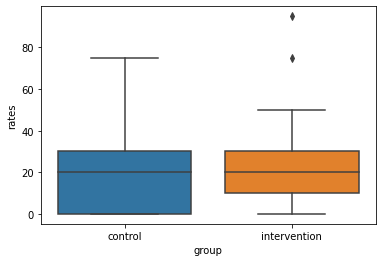

In [7]:
sns.boxplot(x='group', y='rates', data=exercise)

In [8]:
sns.set_theme(style='darkgrid')
sns.set_palette(['#299EF0','#40E0D0'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


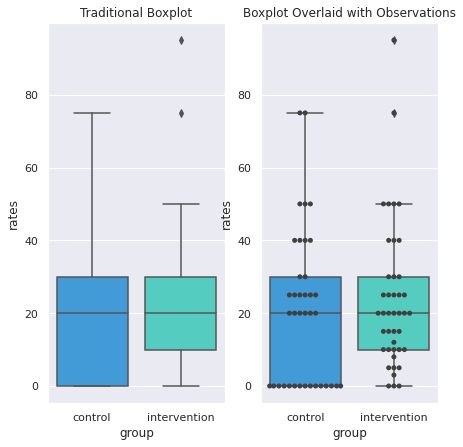

In [9]:
f, axes = plt.subplots(1, 2, figsize=(7, 7))
sns.boxplot(x='group', y='rates', data=exercise,ax=axes[0]).set_title('Traditional Boxplot')

sns.boxplot(x='group', y='rates', data=exercise,ax=axes[1]).set_title('Boxplot Overlaid with Observations')
sns.swarmplot(x='group', y='rates', data=exercise, color='0.25',ax=axes[1])

plt.show()

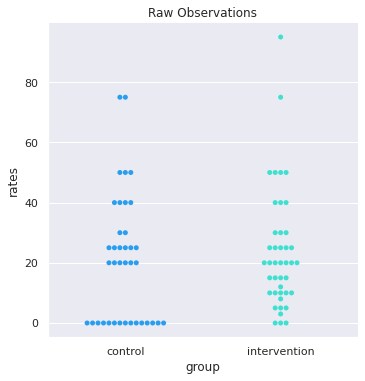

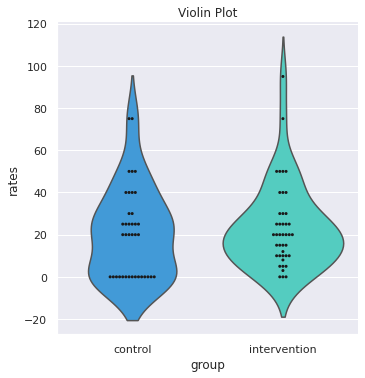

In [10]:
g = sns.catplot(x='group', y='rates', kind='swarm', data=exercise)
g.ax.set_title('Raw Observations')

h = sns.catplot(x='group', y='rates', kind='violin', inner=None, data=exercise)
sns.swarmplot(x='group', y='rates', color='k', size=3, data=exercise, ax=h.ax)
h.ax.set_title('Violin Plot')
plt.show()

Text(0.5, 1.0, 'Boxenplot with Points')

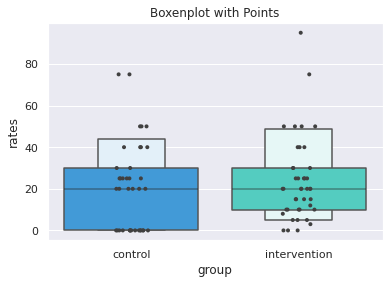

In [11]:
i = sns.boxenplot(x='group', y='rates', data=exercise,showfliers=False)
i = sns.stripplot(x='group', y='rates', data=exercise,size=4,color='0.25')
i.set_title('Boxenplot with Points')

In [12]:
sns.set_theme(style='darkgrid')
sns.set_palette(['#299EF0','#40E0D0'])

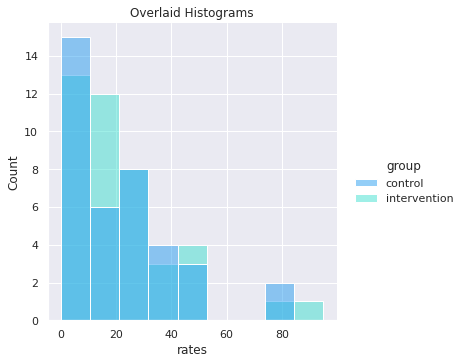

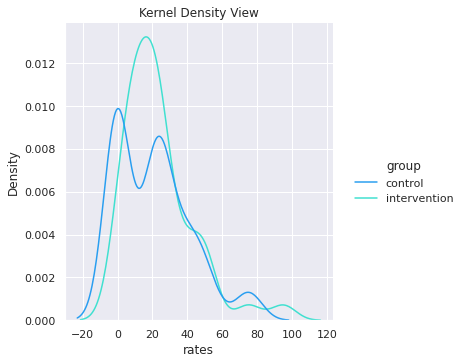

In [13]:
g = sns.displot(exercise, x='rates', hue='group',bins=9)
g.ax.set_title('Overlaid Histograms')

h = sns.displot(exercise, x='rates', hue='group',kind='kde',bw_adjust=.75)
h.ax.set_title('Kernel Density View')
plt.show()

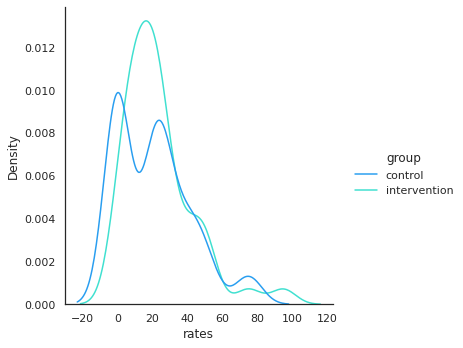

In [14]:
sns.set_theme(style='white')
sns.set_palette(['#299EF0','#40E0D0'])
sns.displot(exercise, x='rates', hue='group',kind='kde',bw_adjust=.75)

In [15]:
control = exercise[exercise.group=='control'].rates.to_numpy()
intervention = exercise[exercise.group=='intervention'].rates.to_numpy()
print(f'control group: {control}')
print(f'intervention group: {intervention}')
print('Two-sided t-test for the means of two independent samples of scores with equal variance')
stats.ttest_ind(control, intervention, equal_var=True)

control group: [25 20 75  0 50  0 40  0  0  0  0  0 25 75  0  0 20  0  0  0  0 20 20  0
 25  0 40 20 40 50 25 30 25 20 25 50 30 40]
intervention group: [20 30 25 50  0 40 75 10 15  3 15 95 25 50 40  8 20 25 50  5  5 12 30 40
 10  0 10 20 20 25 10  0 50 20 20  5 15 30 10 25 20 15]
Two-sided t-test for the means of two independent samples of scores with equal variance


Ttest_indResult(statistic=-0.6199348281805003, pvalue=0.5371076001616744)